# **Gözetimli Öğrenme ve Gözetimsiz Öğrenme Algoritmaları Kedi Köpek Görüntü Sınıflandırması**

## **Problem Tanımı**
Bu çalışma, Cat and Dog veri setini kullanarak görüntüleri sınıflandırmak için hem gözetimli hem de gözetimsiz öğrenme algoritmalarını karşılaştırmayı amaçlamaktadır. 

Bu bağlamda:

- **Gözetimli Öğrenme:** Support Vector Machine (SVM) algoritması kullanılacaktır. 
- **Gözetimsiz Öğrenme:** K-Means algoritması uygulanarak veri kümesindeki desenler keşfedilecektir.
  


## **Veri Setinin İncelemesi**

Bu çalışma, [Cats and Dogs veri setini](https://www.kaggle.com/datasets/tongpython/cat-and-dog) kullanarak görüntüleri sınıflandırmayı amaçlamaktadır. Veri seti, iki ana kategoriye ayrılmıştır:

- **Kediler (Cats)**: Kedilere ait görüntüler.
- **Köpekler (Dogs)**: Köpeklere ait görüntüler.

### **Veri Setinin Yapısı**

Veri seti, **eğitim (train)** ve **test** olmak üzere iki ana bölüme ayrılmıştır.

- **Eğitim Seti (train)**: Modelin öğrenmesi için kullanılan veri setidir. 
- **Test Seti (test)**: Eğitim sonunda oluşan modelin doğruluğunu ve genel performansını değerlendirmek amacıyla kullanılan veri setidir.


### **Veri Setinin Detaylı İçeriği**

Veri setinin detaylı içeriği aşağıdaki gibidir:

- **Eğitim Seti**:
  - **Kediler**: 4000 görüntü
  - **Köpekler**: 4005 görüntü
- **Test Seti**:
  - **Kediler**: 1011 görüntü
  - **Köpekler**: 1012 görüntü
  
  ### **Toplam Görüntü Sayısı**

- **Toplam Eğitim Görüntüsü**: 4000 (Kediler) + 4005 (Köpekler) = 8005
- **Toplam Test Görüntüsü**: 1011 (Kediler) + 1012 (Köpekler) = 2023
- **Toplam Görüntü Sayısı**: 8005 (Eğitim) + 2023 (Test) = 10028


## **Keşifsel Veri Analizi (EDA - Exploratory Data Analysis)**

In [1]:
#Kütüphane ekleme
import os, warnings
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from glob import glob
from skimage.transform import resize
from skimage.color import gray2rgb
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

print("Kütüphaneler başarıyla eklendi.")

Kütüphaneler başarıyla eklendi.


In [2]:
train_path = '/kaggle/input/cat-and-dog/training_set/training_set' #eğitim setinin yolu.
test_path = '/kaggle/input/cat-and-dog/test_set/test_set' # test setinin yolu.

In [3]:
# Bu hücrede dosya yolunun doğru okunup okunmadığını kontrol ettik.
print(train_path)
print(test_path)

/kaggle/input/cat-and-dog/training_set/training_set
/kaggle/input/cat-and-dog/test_set/test_set


CATS


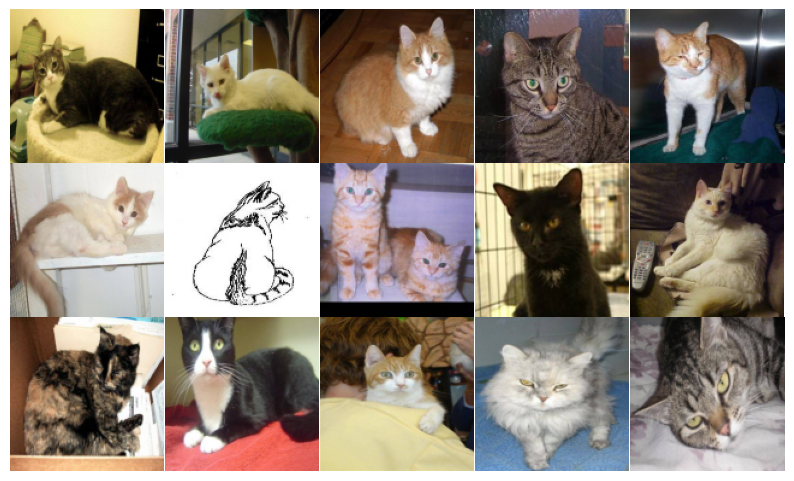

In [4]:
print("CATS")
multipleImages = glob('/kaggle/input/cat-and-dog/training_set/training_set/cats/*.jpg')  # Dosya uzantısını da ekleyin
i = 0
plt.rcParams['figure.figsize'] = (10.0, 10.0)
plt.subplots_adjust(wspace=0, hspace=0)

for im in multipleImages[:15]:
    image = mpimg.imread(im)
    if len(image.shape) == 2:  # Gri tonlamalı görüntü kontrolü
        image = gray2rgb(image)
    image_resized = resize(image, (128, 128), anti_aliasing=True)  # Anti-aliasing ekledim
    plt.subplot(5, 5, i+1)
    plt.imshow(image_resized)
    plt.axis('off')
    i += 1

plt.show()


DOGS


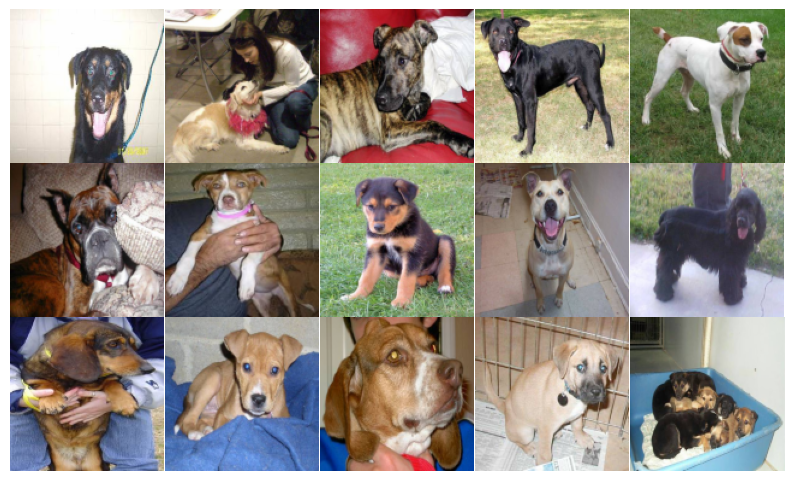

In [5]:
print("DOGS")
multipleImages = glob('/kaggle/input/cat-and-dog/training_set/training_set/dogs/*.jpg')  # Dosya uzantısını da ekleyin
i = 0
plt.rcParams['figure.figsize'] = (10.0, 10.0)
plt.subplots_adjust(wspace=0, hspace=0)

for im in multipleImages[:15]:
    image = mpimg.imread(im)
    if len(image.shape) == 2:  # Gri tonlamalı görüntü kontrolü
        image = gray2rgb(image)
    image_resized = resize(image, (128, 128), anti_aliasing=True)  # Anti-aliasing ekledim
    plt.subplot(5, 5, i+1)
    plt.imshow(image_resized)
    plt.axis('off')
    i += 1

plt.show()

In [6]:
label_names = sorted(os.listdir(train_path))
print(label_names)

['cats', 'dogs']


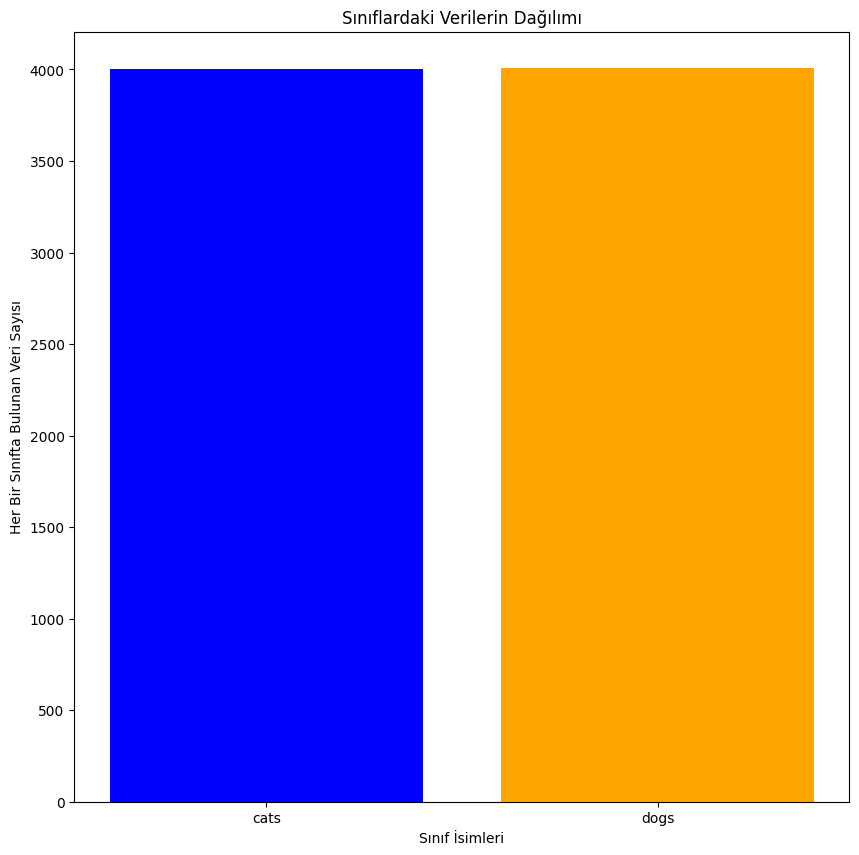

In [7]:
# Her sınıftaki görüntü sayısını saklamak için sözlük oluşturuldu
class_counts = {}

for class_name in label_names:
    class_folder = os.path.join(train_path, class_name)
    files = os.listdir(class_folder)
    class_counts[class_name] = len(files)

# Sınıf sayıları ile bir DataFrame oluşturma
class_counts_df = pd.DataFrame(list(class_counts.items()), columns=['Class', 'Count'])

# Çubuk grafik kullanılarak sınıfların dağılımını görselleştirme
colors = ['blue', 'orange']  # Kediler ve köpekler için renkler

plt.bar(class_counts_df['Class'], class_counts_df['Count'], color=colors)
plt.title('Sınıflardaki Verilerin Dağılımı')
plt.xlabel('Sınıf İsimleri')
plt.ylabel('Her Bir Sınıfta Bulunan Veri Sayısı')
plt.show()

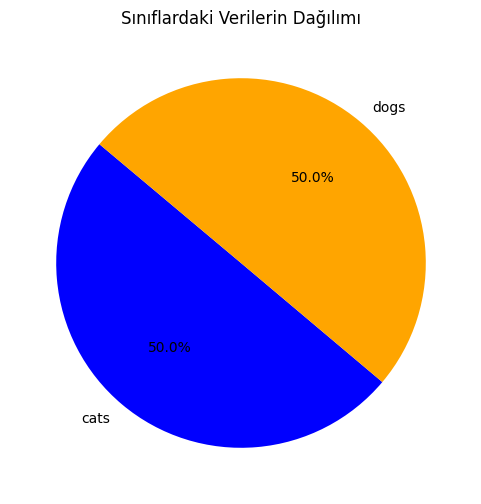

In [8]:
class_counts = {}
for class_name in label_names:
    class_folder = os.path.join(train_path, class_name)
    files = os.listdir(class_folder)
    class_counts[class_name] = len(files)

# Sınıf sayıları ile bir DataFrame oluşturma
class_counts_df = pd.DataFrame(list(class_counts.items()), columns=['Class', 'Count'])

# Pasta grafiği (pie chart) ile görselleştirme
labels = class_counts_df['Class']
sizes = class_counts_df['Count']
colors = ['blue', 'orange']  # Kediler ve köpekler için renkler

# Pasta grafiği oluşturma
plt.figure(figsize=(6, 6))  # figür boyutunu ayarlama
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Sınıflardaki Verilerin Dağılımı')

# Grafiği göster
plt.show()


Çubuk ve pasta grafiğinin çıktıları incelendiğinde veri setinizdeki kedi ve köpek sınıflarının veri miktarları oldukça dengelidir. Her iki sınıf da neredeyse eşit sayıda görüntüye sahiptir. Bu durum, oluşturacağımız modelin kedi ve köpek sınıflarını dengeli bir şekilde öğrenme eğiliminde olacağını göstermektedir, çünkü her iki sınıf da benzer miktarda veri içeriyor.

## **Gözetimli Öğrenme ile Veri Ön İşleme ve Algoritma Seçimi**
* **Etiket Kodlama (Label Encoding):** Kedi ve köpek sınıflarını temsil eden kategorik değişkenlerimiz, makine öğrenmesi algoritmaları tarafından daha iyi anlaşılması için numerik değerlere dönüştürülmüştür. Bu işlemde, kedilere 0, köpeklere 1 gibi etiketler atanmıştır.
* **Veri Bölme:** Modelin eğitimi ve performansının değerlendirilmesi için verilerimiz, eğitim ve test kümeleri olarak ayrılmıştır. Bu sayede, modelin eğitim sırasında görmediği yeni veriler üzerindeki başarısı ölçülebilmektedir.
* **Görüntü Büyüklüğü Normalizasyonu:** Farklı boyutlarda olan görüntülerin, modelin giriş katmanına uyumlu hale getirilmesi için tüm görüntüler aynı boyuta getirilmiştir.


In [9]:
from skimage.transform import resize 
from skimage.io import imread  
print("Kütüphaneler başarıyla eklendi.")

Kütüphaneler başarıyla eklendi.


In [10]:
Categories = ['cats', 'dogs']
flat_data_arr = []  # input array
target_arr = []  # output array
datadir = '/kaggle/input/cat-and-dog/training_set/training_set' 
# path which contains all the categories of images

for i in Categories:
    print(f'loading... category : {i}')
    path = os.path.join(datadir, i)
    for img in os.listdir(path):
        # Sadece görüntü dosyalarını işleme al
        if img.endswith(('jpg', 'jpeg', 'png')): #Veri setinde görüntü olmayan dosyalarda bulunduğu için bu satırı ekledik.
            img_array = imread(os.path.join(path, img))
            img_resized = resize(img_array, (150, 150, 3))  # Bu satır tüm resimlerin boyutlarının eşitlenmesini sağlar.
            flat_data_arr.append(img_resized.flatten())
            target_arr.append(Categories.index(i))
    print(f'loaded category: {i} successfully')

flat_data = np.array(flat_data_arr)
target = np.array(target_arr)

loading... category : cats
loaded category: cats successfully
loading... category : dogs
loaded category: dogs successfully


In [11]:
#dataframe 
df=pd.DataFrame(flat_data)  
df['Target']=target 
df.shape

(8005, 67501)

In [12]:
#input data  
x=df.iloc[:,:-1]  
#output data 
y=df.iloc[:,-1]

In [13]:
from sklearn.model_selection import train_test_split
# Veri setinin %80 eğitim ve %20 test olarak ayrıldı.
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20, 
                                               random_state=0) 


print("Veri seti bölme işlemi başarıyla gerçekleştirildi.")

Veri seti bölme işlemi başarıyla gerçekleştirildi.


In [14]:
# Veriyi standartlaştırma
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)


In [15]:
from sklearn.decomposition import PCA
pca = PCA()
x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)

In [16]:
# SVM modelini oluşturma ve eğitim
from sklearn.svm import SVC
svm = SVC(kernel='linear', probability=True, random_state=42)
svm.fit(x_train, y_train)

SVC(kernel='linear', probability=True, random_state=42)

In [17]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

# Test veri seti ile modeli test etme
y_pred = svm.predict(x_test)

# Modelin doğruluğunu hesaplama
accuracy = accuracy_score(y_test, y_pred)

# Precision, recall ve f1-score metriklerini hesaplama 
precision = precision_score(y_test, y_pred, average='binary')  # 'binary' iki sınıflı problem için uygundur, çoklu sınıflandırma da 'weight' kullanılabilir.
recall = recall_score(y_test, y_pred, average='binary')
f1 = f1_score(y_test, y_pred, average='binary')

# Doğruluk, precision, recall ve f1-score'u yüzde formatında yazdırma
print(f"Doğruluk (Accuracy): {accuracy * 100:.2f}%")
print(f"Precision: {precision * 100:.2f}%")
print(f"Recall: {recall * 100:.2f}%")
print(f"F1 Skoru: {f1 * 100:.2f}%")

# Detaylı sınıflandırma raporunu oluşturma
print("\nDetaylı Sınıflandırma Raporu:\n", classification_report(y_test, y_pred, target_names=Categories))

# Karışıklık matrisini yazdırma
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", conf_matrix)

Doğruluk (Accuracy): 56.84%
Precision: 56.97%
Recall: 52.15%
F1 Skoru: 54.45%

Detaylı Sınıflandırma Raporu:
               precision    recall  f1-score   support

        cats       0.57      0.61      0.59       809
        dogs       0.57      0.52      0.54       792

    accuracy                           0.57      1601
   macro avg       0.57      0.57      0.57      1601
weighted avg       0.57      0.57      0.57      1601


Confusion Matrix:
 [[497 312]
 [379 413]]


## **Gözetimsiz Öğrenme ile Veri Ön İşleme ve Algoritma Seçimi**

In [18]:
num_clusters = 2  # Kategoriler: 'cats' ve 'dogs'

In [19]:
 # Özellikleri standartlaştırma
scaler = StandardScaler()
flat_data_scaled = scaler.fit_transform(flat_data)

In [20]:
# K-means kümeleme
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=num_clusters, n_init=10,random_state=42)
kmeans.fit(flat_data_scaled)

KMeans(n_clusters=2, n_init=10, random_state=42)

In [21]:
# PCA ile boyut indirgeme
pca = PCA(n_components=2)
flat_data_scaled = pca.fit_transform(flat_data_scaled)

In [22]:
labels = kmeans.labels_

Küme Etiketleri:
Küme 0: dogs
Küme 1: cats


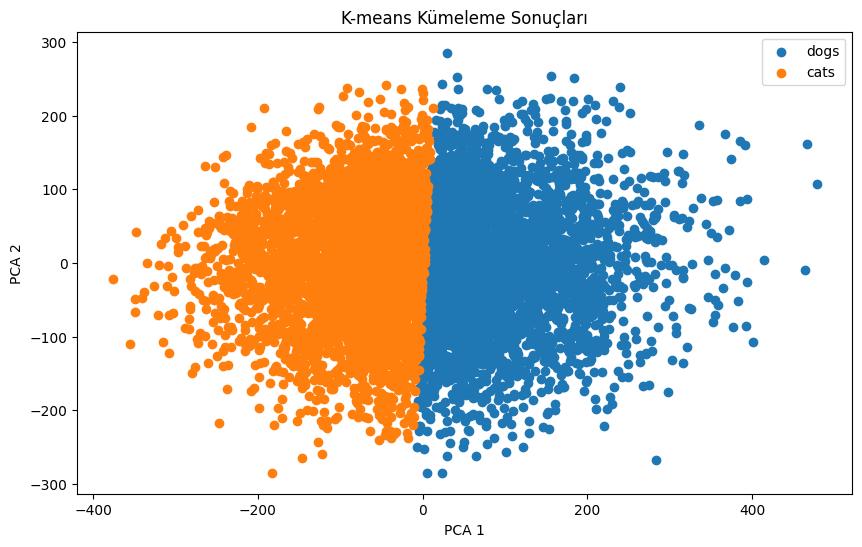

In [23]:
# Küme merkezlerinin hangi sınıfa ait olduğunu belirlemek için örnek kontrolü
def determine_cluster_labels(target_arr, labels):
    # Her kümenin hangi sınıfa ait olduğunu belirlemek için
    cluster_labels = {}
    
    for i in range(num_clusters):
        cluster_indices = np.where(labels == i)[0]
        cluster_targets = [target_arr[idx] for idx in cluster_indices]
        most_common_label = np.bincount(cluster_targets).argmax()  # En yaygın etiket
        cluster_labels[i] = Categories[most_common_label]

    return cluster_labels

# Küme etiketlerini belirleme
cluster_labels = determine_cluster_labels(target_arr, labels)

# Küme etiketlerini yazdırma
print("Küme Etiketleri:")
for cluster, label in cluster_labels.items():
    print(f"Küme {cluster}: {label}")

# Nokta şeklinde görselleştirme
plt.figure(figsize=(10, 6))
for i in range(num_clusters):
    plt.scatter(flat_data_scaled[labels == i, 0], flat_data_scaled[labels == i, 1], label=f'{cluster_labels[i]}')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('K-means Kümeleme Sonuçları')
plt.legend()
plt.show()


In [24]:
from scipy.stats import mode
new_labels = np.zeros_like(labels)
for i in range(num_clusters):
    mask = (labels == i)
    new_labels[mask] = mode(target[mask])[0]

# Performans metriklerini hesaplama
accuracy = accuracy_score(target, new_labels)
precision = precision_score(target, new_labels)
recall = recall_score(target, new_labels)
f1 = f1_score(target, new_labels)

# Sonuçları yazdırma
print(f"Doğruluk (Accuracy): {accuracy * 100:.2f}%")
print(f"Precision: {precision * 100:.2f}%")
print(f"Recall: {recall * 100:.2f}%")
print(f"F1 Skoru: {f1 * 100:.2f}%")

Doğruluk (Accuracy): 51.83%
Precision: 51.90%
Recall: 50.69%
F1 Skoru: 51.29%
